<center><h2><strong><font color="blue">Pendahuluan Data Mining</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/course/adm/"> https://tau-data.id/course/adm/ </a></font></strong></h3></center>

<img alt="" src="images/Cover_ADM.png" />

<center><h2><strong><font color="blue">Supervised Learning - Classification 03</font></strong></h2></center>
<center><font color="blue">Support Vector Machines, Neural Network, Ensemble Learning, and dealing with Imbalance Data</font></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/lesson/adm-classification-03/">https://tau-data.id/lesson/adm-classification-03/</a></font></strong></h3></center>
<b><center><h3>(C) Taufik Sutanto</h3></center>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Outline:

1.	Pendahuluan Model Ensemble
2.	Contoh permasalahan
3.	Algoritma Bagging & Boosting
4.	Pendahuluan Imbalance Learning
5.	Oversampling and under sampling
6.	Weighted Tree Model
7.	Weighted Margin Models

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
import warnings; warnings.simplefilter('ignore')

<h2 id="Ensemble-Model">Ensemble Model</h2>

<ul>
	<li>What? a learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions.</li>
	<li>Why? Better prediction, More stable model</li>
	<li>How? Bagging &amp; Boosting</li>
</ul>
<img alt="" src="images/Ensemble.png" style="width: 500px; height: 213px;" />

## “meta-algorithms” : Bagging & Boosting
* Ensemble https://www.youtube.com/watch?v=Un9zObFjBH0 
* Bagging https://www.youtube.com/watch?v=2Mg8QD0F1dQ 
* Boosting https://www.youtube.com/watch?v=GM3CDQfQ4sw

<p><img alt="" src="images/Bagging_VS_Boosting.png" style="width: 500px; height: 185px;" /></p>


<img alt="" src="images/Bagging-Boosting_Usage.png" style="width: 500px; height: 281px;" />

<h2 id="Ada-Boost">AdaBoost</h2>
<ul>
	<li><a href="https://youtu.be/BoGNyWW9-mE?t=70" target="_blank">https://youtu.be/BoGNyWW9-mE?t=70</a></li>
</ul>
<img alt="" src="images/AdaBoost.png" style="width: 400px; height: 332px;" />

In [4]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufikedys/taudata-Indonesia/master/data/diabetes.data.csv
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array

X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

kNN = KNeighborsClassifier(3)
kNN.fit(X_train, Y_train)
Y_kNN = kNN.score(X_test, Y_test)

DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)
Y_DT = DT.score(X_test, Y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(X_train,Y_train)
Y_Vot = model.score(X_test,Y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.696969696969697
Akurasi Decision Tree 0.6493506493506493
Akurasi Votting 0.670995670995671


In [5]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = DecisionTreeClassifier()
K = KNeighborsClassifier()
R= LogisticRegression()

T.fit(X_train,Y_train)
K.fit(X_train,Y_train)
R.fit(X_train,Y_train)

y_T=T.predict_proba(X_test)
y_K=K.predict_proba(X_test)
y_R=R.predict_proba(X_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(Y_test, prediction))

[[0.6806747  0.3193253 ]
 [0.6352488  0.3647512 ]
 [0.18196    0.81804   ]
 [0.95573396 0.04426604]
 [0.58287068 0.41712932]]
[0, 0, 1, 0, 0]
Akurasi Averaging 0.7229437229437229


In [6]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=9)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7421565276828435


<h2 id="Imbalance-Data">Imbalance Data</h2>
* Metric Trap
* Akurasi kategori tertentu lebih penting
* Contoh kasus
<img alt="" src="images/imbalance.png" />

<ul>
	<li>Undersampling</li>
	<li>Oversampling</li>
	<li>Model Based (weight adjustment)</li>
</ul>
<img alt="" src="images/under-over-sampling.png" style="width: 500px; height: 147px;" />
* https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
* Plot perbandingan: https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py

In [7]:
data = pd.read_csv(file, names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


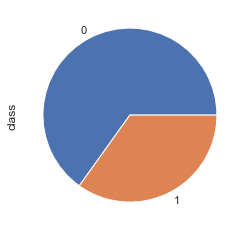

In [8]:
plot = data["class"].value_counts().plot(kind='pie')

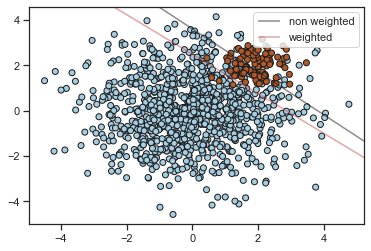

In [9]:
# Example of model-based imbalance treatment - SVM
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

## Weighted Decision Tree

In [10]:
data = pd.read_csv(file, names=names).values # Rubah ke numpy array
X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

del T
T = DecisionTreeClassifier(random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

del T
T = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.7056277056277056
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       158
         1.0       0.54      0.51      0.52        73

    accuracy                           0.71       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.70      0.71      0.70       231

Akurasi  (Weighted Decision tree) =  0.7402597402597403
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.81       158
         1.0       0.60      0.53      0.57        73

    accuracy                           0.74       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.73      0.74      0.74       231



<h1 id="EoM">End of Module<br />
<hr />
